In [5]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "../data/merged/ipl_merged_deliveries.csv"  # Adjust if needed
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,1,0,0,0,1,NaN,NaN,NaN
1,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,0,0,0,0,0,NaN,NaN,NaN
2,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,1,1,0,0,0,NaN,NaN,NaN
3,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,0,0,0,0,0,NaN,NaN,NaN
4,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.3,Gaikwad,Umesh Yadav,0,0,0,0,0,0,caught,Gaikwad,Nitish Rana


In [5]:
#Exploratory Data Analysis

In [6]:

# Overview of the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52351 entries, 0 to 52350
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          52351 non-null  int64  
 1   season            52351 non-null  int64  
 2   match_no          52351 non-null  int64  
 3   date              52351 non-null  object 
 4   venue             52351 non-null  object 
 5   batting_team      52351 non-null  object 
 6   bowling_team      52351 non-null  object 
 7   innings           52351 non-null  int64  
 8   over              52351 non-null  float64
 9   striker           52351 non-null  object 
 10  bowler            52351 non-null  object 
 11  runs_of_bat       52351 non-null  int64  
 12  extras            52351 non-null  int64  
 13  wide              52351 non-null  int64  
 14  legbyes           52351 non-null  int64  
 15  byes              52351 non-null  int64  
 16  noballs           52351 non-null  int64 

,match_id,season,match_no,innings,over,runs_of_bat,extras,wide,legbyes,byes,noballs
count,52351.000000,52351.000000,52351.000000,52351.000000,52351.000000,52351.000000,52351.000000,52351.000000,52351.000000,52351.000000,52351.000000
mean,202334.986743,2022.983592,36.627591,1.482780,9.627308,1.365456,0.073103,0.038013,0.013199,0.002178,0.004623
std,83.782914,0.817092,21.116393,0.499708,5.693605,1.743560,0.359593,0.191229,0.114129,0.046614,0.067833
min,202201.000000,2022.000000,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202254.000000,2022.000000,18.000000,1.000000,4.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202334.000000,2023.000000,36.000000,1.000000,9.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,202417.000000,2024.000000,55.000000,2.000000,14.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,202474.000000,2024.000000,74.000000,2.000000,19.600000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#1. Checking Unique Values 
# Check unique values in categorical columns
df.nunique()

match_id            217
season                3
match_no             74
date                177
venue                17
batting_team         10
bowling_team         10
innings               2
over                120
striker             277
bowler              215
runs_of_bat           7
extras                6
wide                  2
legbyes               2
byes                  2
noballs               2
wicket_type           8
player_dismissed    249
fielder             380
dtype: int64

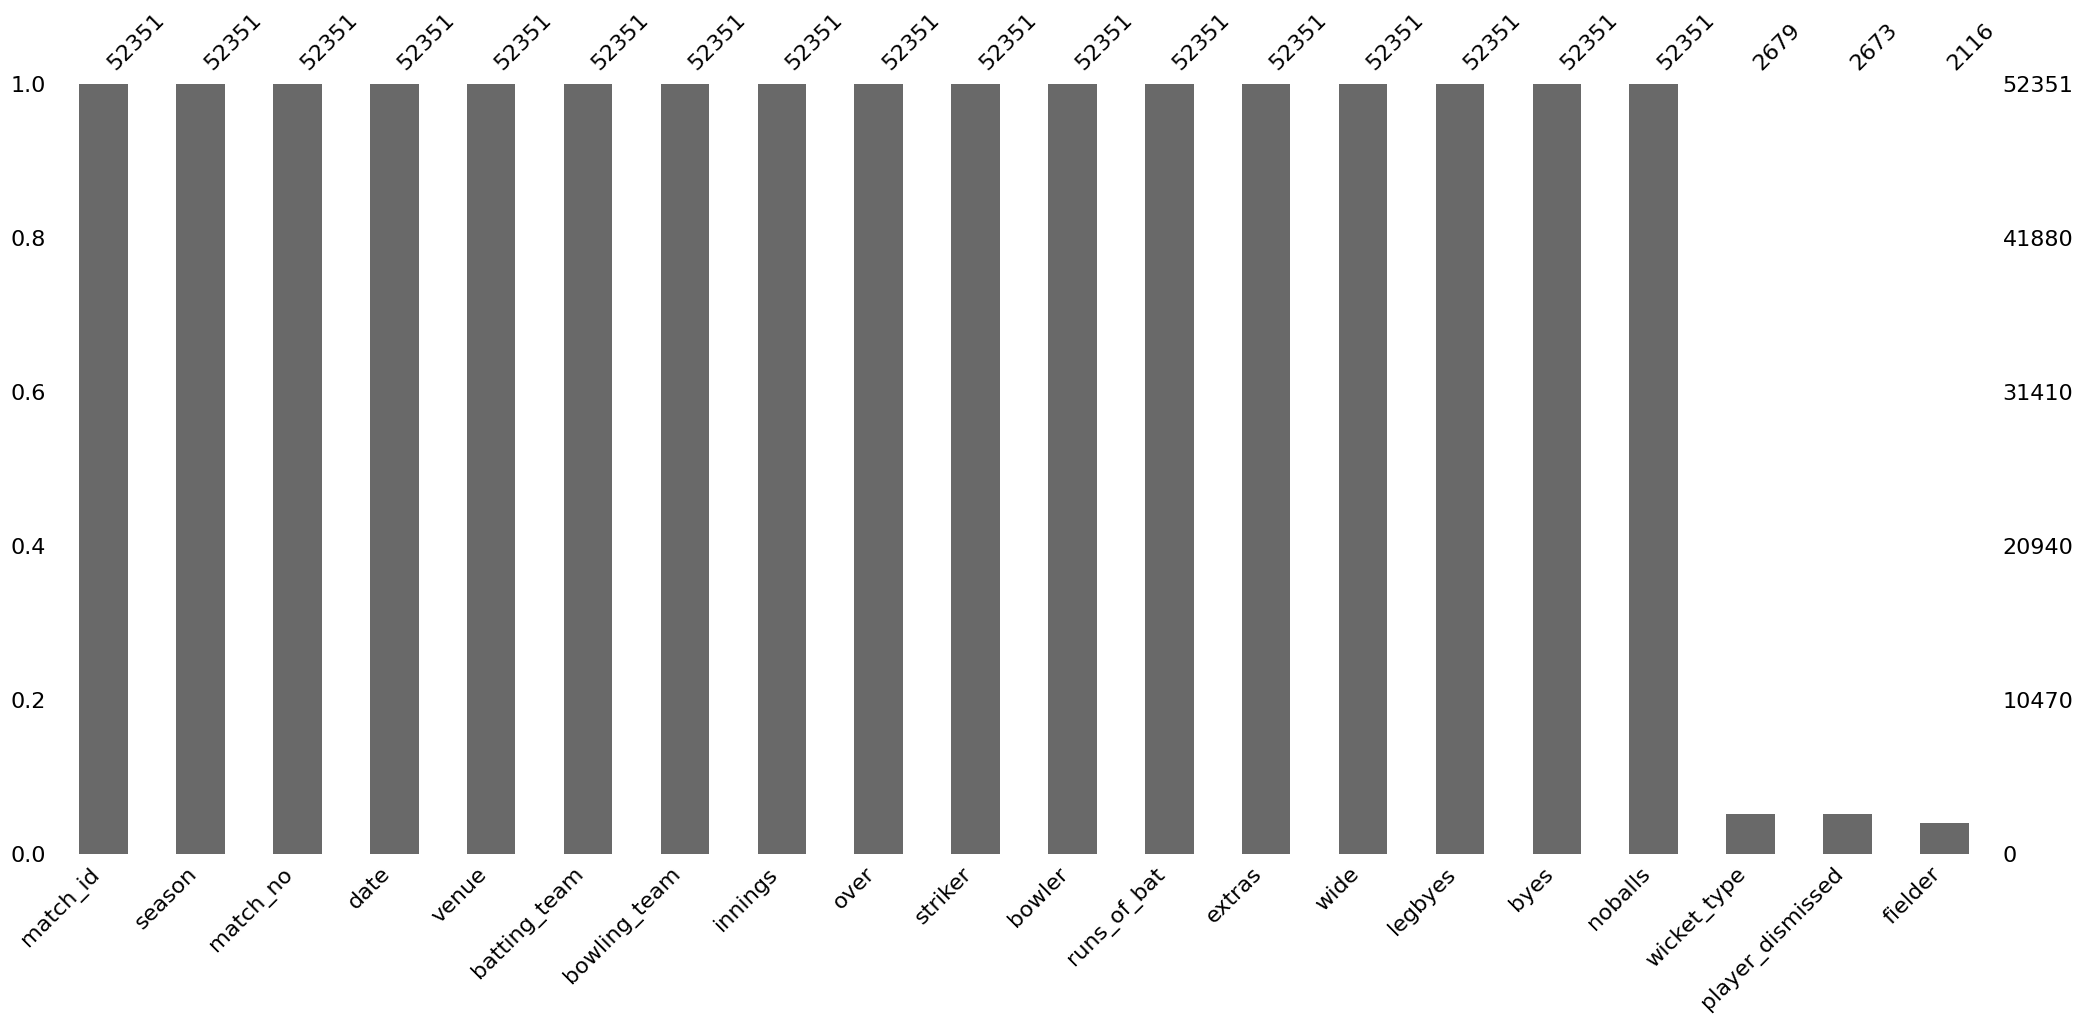

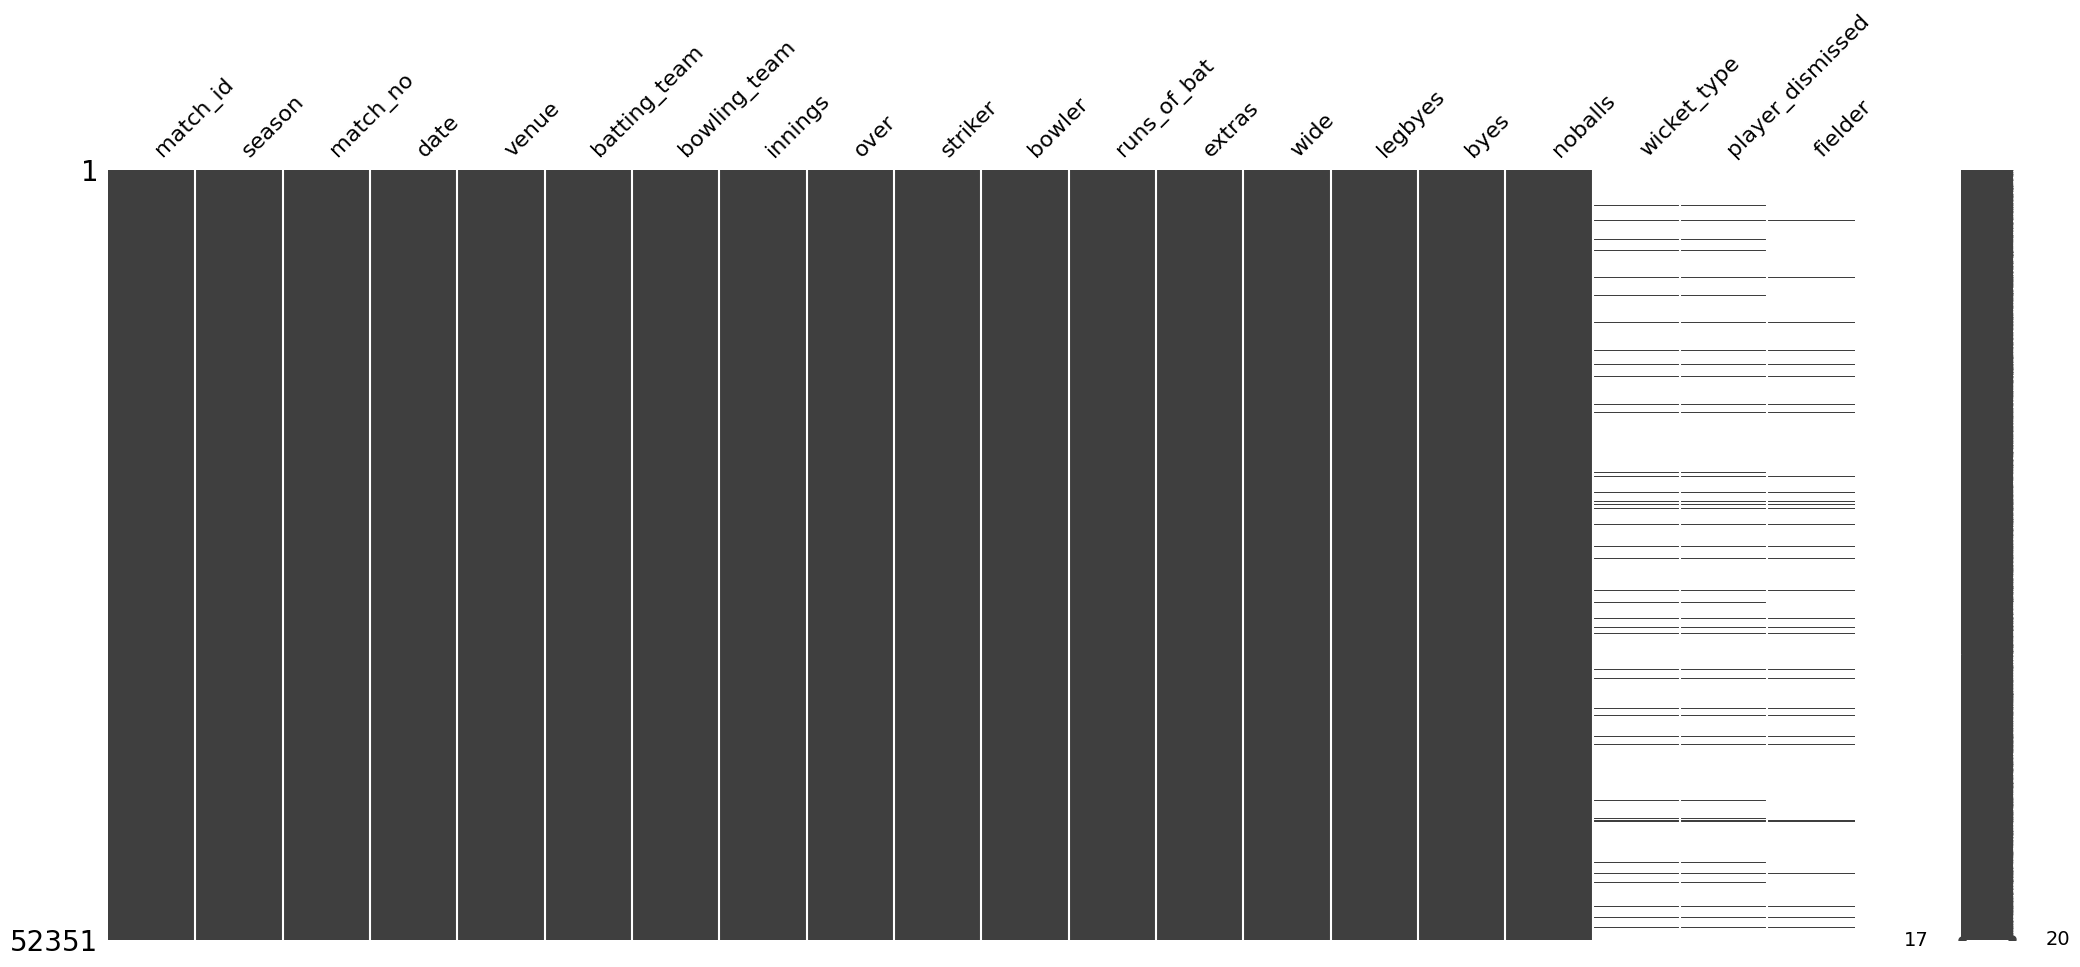

In [7]:
#2️ Detecting & Handling Missing Values
# Visualizing missing values
import missingno as msno
msno.bar(df)  # Bar chart of missing data
msno.matrix(df)  # Heatmap visualization of missing data

# Dropping or filling missing values
df.dropna(inplace=True)  # Remove rows with missing values
# Fill missing values: numerical columns with median, categorical with mode
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numerical columns
df.fillna(df.mode().iloc[0], inplace=True)  # Fill categorical columns

In [8]:
#3.Checking for Duplicate Data
# Find duplicate rows
df.duplicated().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

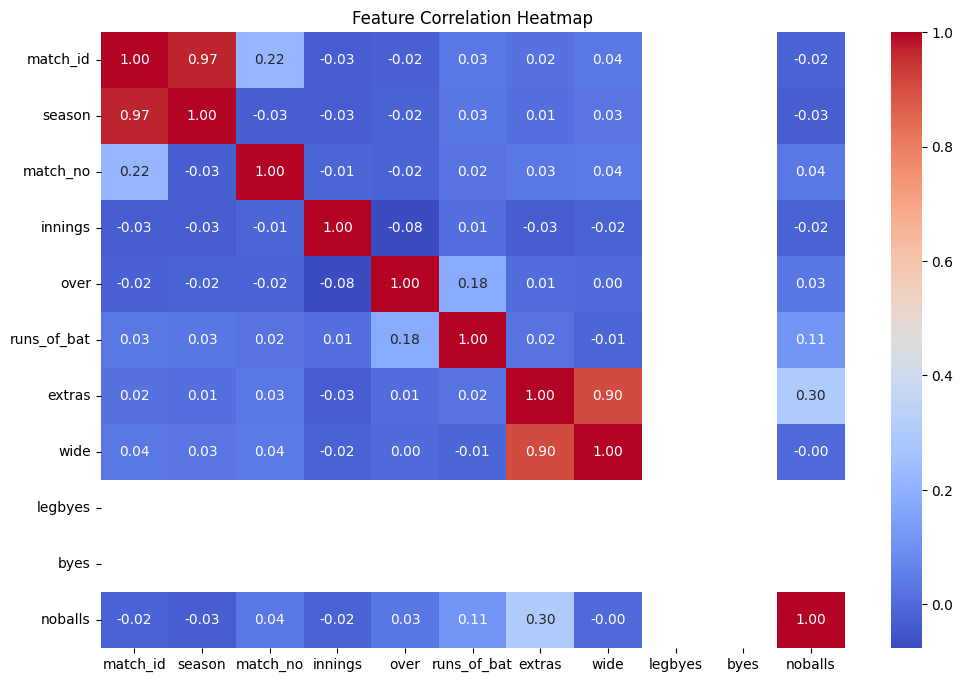

In [34]:
#4 Compute correlation matrix for numeric columns only
corr_matrix = df.select_dtypes(include=['number']).corr()

# Visualizing correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
print(df.columns)  # Display all column names

Index(['match_id', 'season', 'match_no', 'date', 'venue', 'batting_team',
       'bowling_team', 'innings', 'over', 'striker', 'bowler', 'runs_of_bat',
       'extras', 'wide', 'legbyes', 'byes', 'noballs', 'wicket_type',
       'player_dismissed', 'fielder'],
      dtype='object')


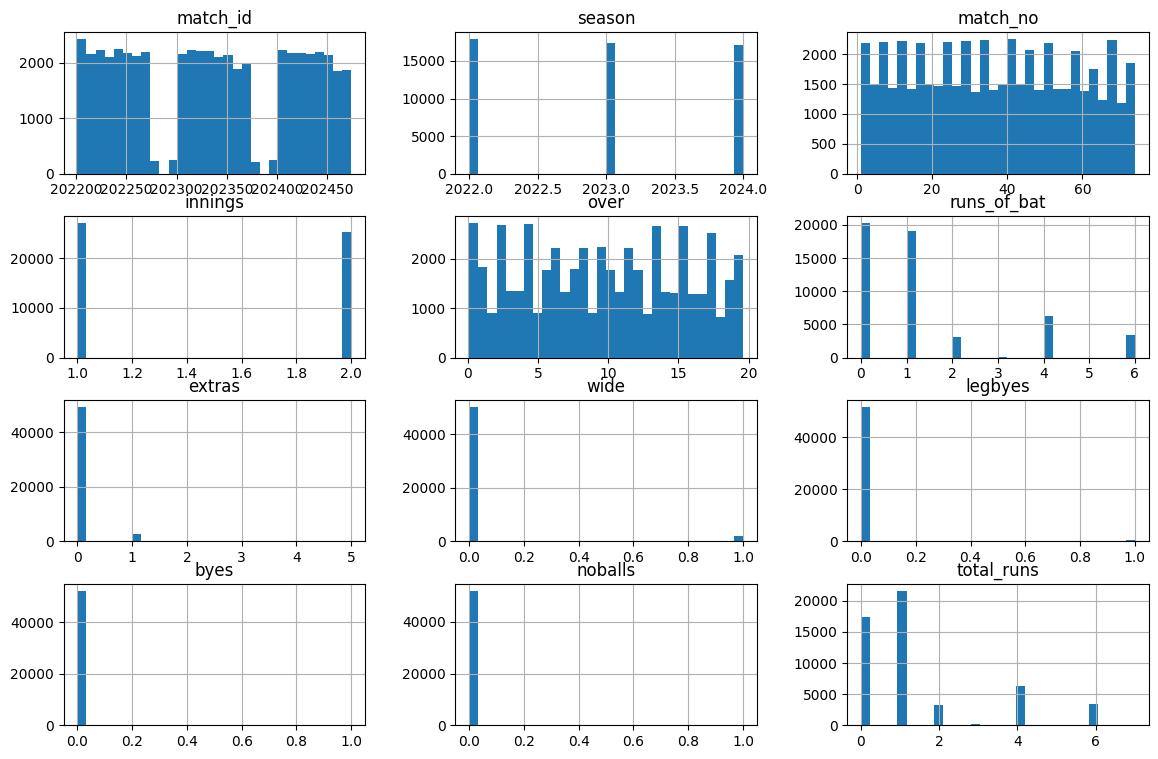

C:\Users\vadda\AppData\Local\Temp\ipykernel_22384\2224907406.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['season'], palette="Set2", edgecolor="black", linewidth=1.5, alpha=0.9)


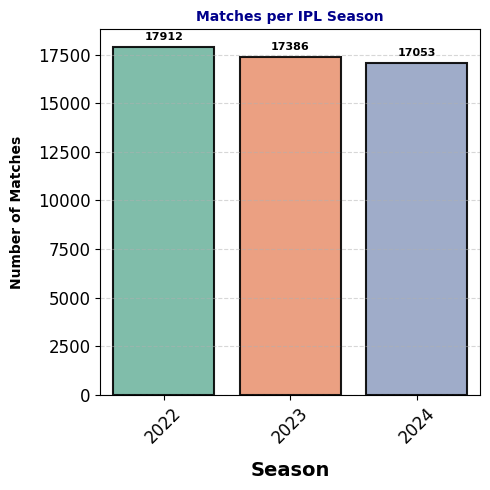

C:\Users\vadda\AppData\Local\Temp\ipykernel_22384\2224907406.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df['venue'], order=df['venue'].value_counts().index,


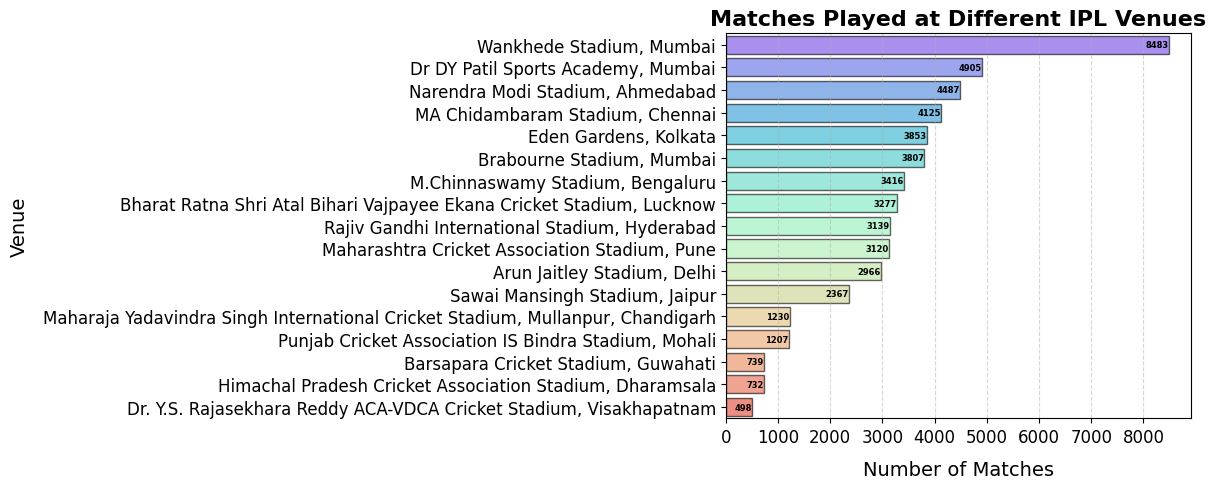

In [56]:
#5 Feature Distribution (Numerical & Categorical Data)
# Histogram for numerical columns
df.hist(figsize=(14,9), bins=30)
plt.savefig("../data/merged/numerical_feature_distribution.png")
plt.show()


# Countplot for categorical variables (e.g., 'season')
plt.figure(figsize=(5, 5))  # Increased figure size for clarity
ax = sns.countplot(x=df['season'], palette="Set2", edgecolor="black", linewidth=1.5, alpha=0.9)
# Formatting
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)
plt.xlabel("Season", fontsize=14, labelpad=10, fontweight="bold")
plt.ylabel("Number of Matches", fontsize=10, labelpad=10, fontweight="bold")
plt.title("Matches per IPL Season", fontsize=10, fontweight="bold", color="darkblue")
plt.grid(axis="y", linestyle="--", alpha=0.5)  # Light grid lines
# Add count labels above bars
for bar in ax.patches:
    ax.annotate(f"{int(bar.get_height())}",  
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),  
                xytext=(0, 5),  # Slightly more offset above bars
                textcoords="offset points",
                ha='center', fontsize=8, fontweight='bold', color='black')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig("../data/merged/matches_per_season.png")
plt.show()


# Countplot for venues, sorted by frequency
plt.figure(figsize=(6, 5))  
ax = sns.countplot(y=df['venue'], order=df['venue'].value_counts().index, 
                   palette="rainbow", edgecolor="black", alpha=0.6)
plt.xlabel("Number of Matches", fontsize=14, labelpad=10)
plt.ylabel("Venue", fontsize=14, labelpad=10)
plt.title("Matches Played at Different IPL Venues", fontsize=16, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5)  # Grid lines for better visualization
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add count labels inside bars
for bar in ax.patches:
    plt.text(bar.get_width() - 5,  # X-coordinate (adjust for alignment)
             bar.get_y() + bar.get_height()/2,  # Y-coordinate (center of bar)
             int(bar.get_width()),  # Value to display
             ha='right', va='center', fontsize=6, fontweight='bold', color='black')
plt.savefig("../data/merged/matches_per_venue.png") 
plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52351 entries, 0 to 52350
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          52351 non-null  int64  
 1   season            52351 non-null  int64  
 2   match_no          52351 non-null  int64  
 3   date              52351 non-null  object 
 4   venue             52351 non-null  object 
 5   batting_team      52351 non-null  object 
 6   bowling_team      52351 non-null  object 
 7   innings           52351 non-null  int64  
 8   over              52351 non-null  float64
 9   striker           52351 non-null  object 
 10  bowler            52351 non-null  object 
 11  runs_of_bat       52351 non-null  int64  
 12  extras            52351 non-null  int64  
 13  wide              52351 non-null  int64  
 14  legbyes           52351 non-null  int64  
 15  byes              52351 non-null  int64  
 16  noballs           52351 non-null  int64 

C:\Users\vadda\AppData\Local\Temp\ipykernel_22384\1552752720.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.index, y=top_batsmen.values, palette="coolwarm")


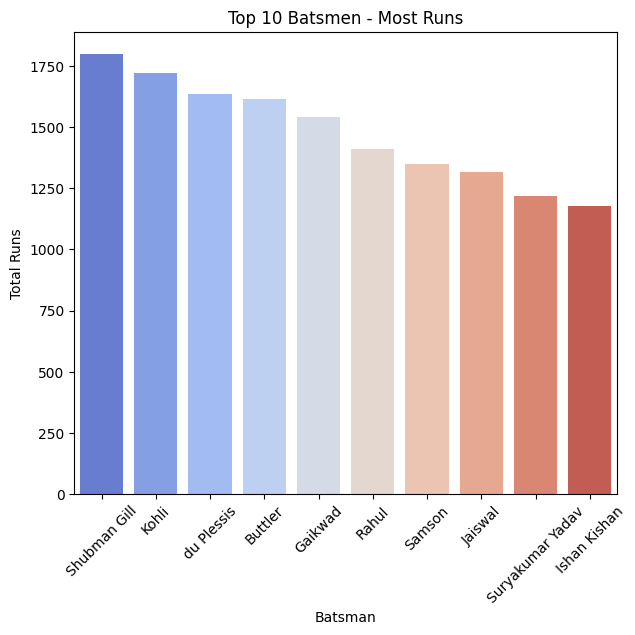

C:\Users\vadda\AppData\Local\Temp\ipykernel_22384\1552752720.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.index, y=top_bowlers.values, palette="plasma")  # Bright colors


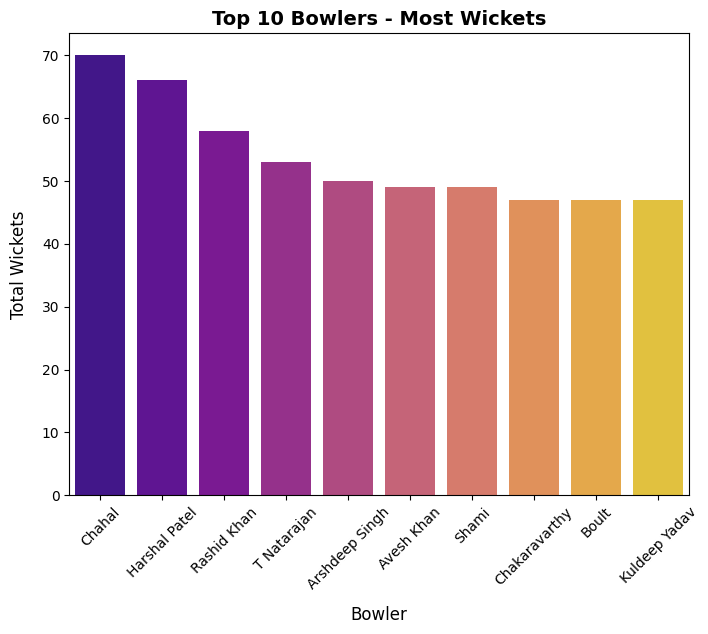

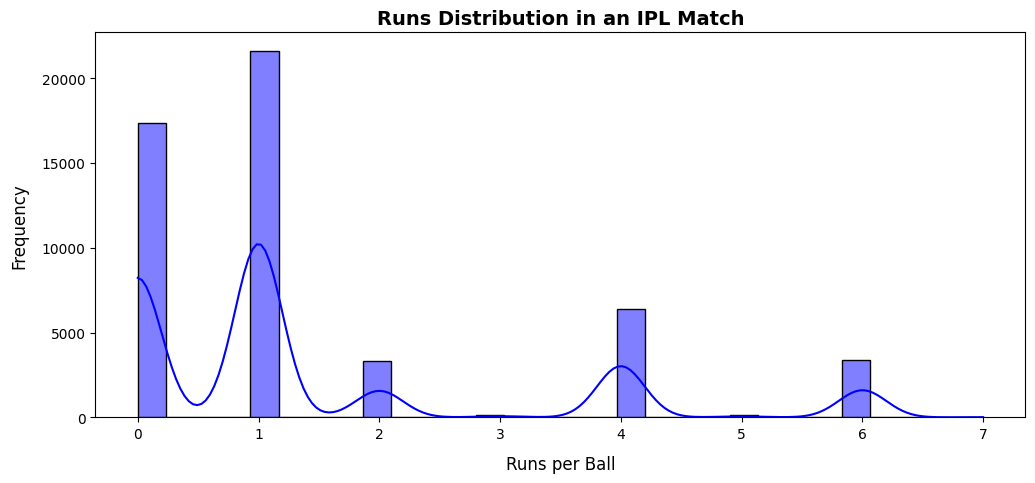

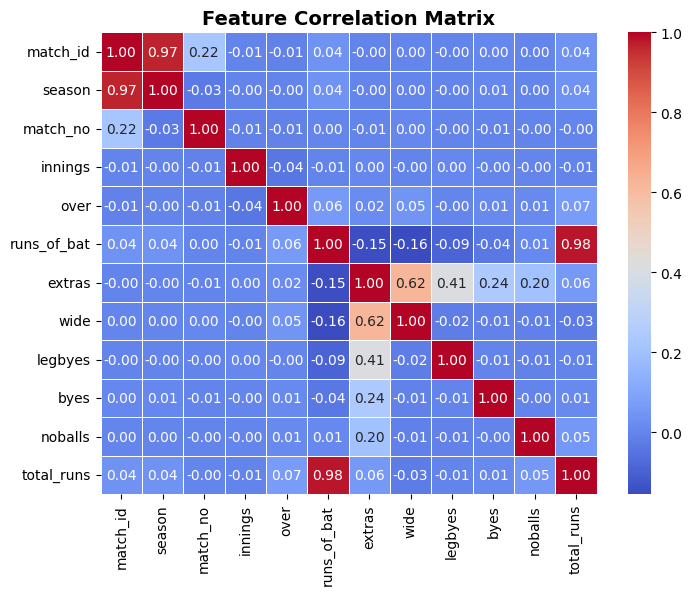

In [82]:
#6 Data visualization
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/merged/ipl_merged_deliveries.csv")  # Adjust path if needed

# Data overview
print(df.info())  # Check columns and missing values
print(df.describe())  # Summary statistics
print(df.isnull().sum())  # Check for missing values

# 1. Most Runs by Batsmen
plt.figure(figsize=(7, 6))
top_batsmen = df.groupby("striker")["runs_of_bat"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_batsmen.index, y=top_batsmen.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Batsmen - Most Runs")
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
# Save the image
plt.savefig("../data/merged/top_batsmen.png")  
plt.show()


# 2️. Best Bowlers - Most Wickets
plt.figure(figsize=(8, 6))
# Count dismissals where a bowler took a wicket (non-null values in 'wicket_type')
top_bowlers = df[df["wicket_type"].notnull()].groupby("bowler")["wicket_type"].count().sort_values(ascending=False).head(10)
sns.barplot(x=top_bowlers.index, y=top_bowlers.values, palette="plasma")  # Bright colors
plt.xticks(rotation=45)
plt.title("Top 10 Bowlers - Most Wickets", fontsize=14, fontweight="bold")
plt.xlabel("Bowler", fontsize=12, labelpad=10)
plt.ylabel("Total Wickets", fontsize=12, labelpad=10)
# Save the image
plt.savefig("../data/merged/top_bowlers.png")  
plt.show()

# 3️. Runs Distribution in an IPL Match
plt.figure(figsize=(12,5))
# Compute total runs per ball
df["total_runs"] = df["runs_of_bat"] + df["extras"]
sns.histplot(df["total_runs"], bins=30, kde=True, color="blue")
plt.title("Runs Distribution in an IPL Match", fontsize=14, fontweight="bold")
plt.xlabel("Runs per Ball", fontsize=12, labelpad=10)
plt.ylabel("Frequency", fontsize=12, labelpad=10)
# Save the image
plt.savefig("../data/merged/runs_distribution.png")  
plt.show()


# 4. Correlation Matrix
plt.figure(figsize=(8, 6))
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=14, fontweight="bold")
# Save the image
plt.savefig("../data/merged/correlation_matrix.png")
plt.show()



In [ ]:
#Match-Winning Prediction (Classification: Win/Loss)

#Step 1: Define the Problem Statement
'''
We want to predict the winner of an IPL match based on historical data.
          ------------------------------------
Type of Problem: Classification:
Target Variable: match_winner (team that won the match)
Input Features (Predictors):
1.venue
2.batting_team
3.bowling_team
4.innings
5.over
6.total_runs
7.(Any other useful features)
'''
#Step 2: Data Preprocessing
print(df.columns)






'\nWe want to predict the winner of an IPL match based on historical data.\n          ------------------------------------\nType of Problem: Classification:\nTarget Variable: match_winner (team that won the match)\nInput Features (Predictors):\n1.venue\n2.batting_team\n3.bowling_team\n4.innings\n5.over\n6.total_runs\n7.(Any other useful features)\n'